In [14]:
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd,nd
import random

In [25]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [26]:
features[0], labels[0]

(
 [-0.16038011  0.84187603]
 <NDArray 2 @cpu(0)>,
 
 [1.0182536]
 <NDArray 1 @cpu(0)>)

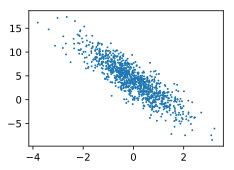

In [27]:
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(),1);  # 加分号只显示图

In [28]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [29]:
def data_iter(batch_size, features, labels):
    #数据的随机检索，相当于pytorch里的enumerate的作用，类似，但是不完全相同
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)  # take函数根据索引返回对应元素

In [30]:
batch_size = 10
i=0
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    i+=1
print(i)


[[-0.13426067 -0.5198567 ]
 [ 1.2906017  -0.24425852]
 [-0.67341524  1.6738983 ]
 [ 1.2765957  -1.0358865 ]
 [-0.14777002 -0.34906965]
 [ 0.92926574 -0.80137885]
 [-0.4542452   1.227862  ]
 [-0.29434565 -0.65432656]
 [ 2.1234426   0.9171965 ]
 [-0.13464269  0.25716028]]
<NDArray 10x2 @cpu(0)> 
[ 5.6993065  7.616516  -2.8406684 10.272648   5.1041903  8.798182
 -0.8688908  5.82394    5.3241935  3.0502086]
<NDArray 10 @cpu(0)>

[[ 0.45073456 -0.25853732]
 [-0.00359864  0.13199449]
 [ 0.13258977 -1.2686566 ]
 [ 1.8022759  -0.23091704]
 [ 0.248519    1.1925219 ]
 [-0.839238    0.64386874]
 [-0.7733064   0.00372435]
 [ 0.7614166   0.6287352 ]
 [ 0.20849532 -0.7115333 ]
 [ 0.3276303   1.8758955 ]]
<NDArray 10x2 @cpu(0)> 
[ 5.968013   3.7485933  8.798677   8.601917   0.643875   0.3267047
  2.62409    3.5808988  7.0255713 -1.5146438]
<NDArray 10 @cpu(0)>

[[ 1.3489803  -3.0220437 ]
 [ 0.6460759  -1.1121595 ]
 [-0.62891597  0.6981876 ]
 [ 0.53419954 -0.9948248 ]
 [-0.19751765 -0.2362649 ]
 [-0.

In [31]:
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))
w.attach_grad()
b.attach_grad()

In [32]:
def linreg(X, w, b):  # 本函数已保存在d2lzh包中方便以后使用
    return nd.dot(X, w) + b
def squared_loss(y_hat, y):  # 本函数已保存在d2lzh包中方便以后使用
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2
def sgd(params, lr, batch_size):  # 本函数已保存在d2lzh包中方便以后使用
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [33]:
lr = 0.1
num_epochs = 10
net = linreg
loss = squared_loss

for epoch in range(num_epochs):  # 训练模型一共需要num_epochs个迭代周期
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次（假设样本数能够被批量大小整除）。X
    # 和y分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)  # l是有关小批量X和y的损失
        l.backward()  # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)  # 使用小批量随机梯度下降迭代模型参数
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.000049
epoch 2, loss 0.000051
epoch 3, loss 0.000049
epoch 4, loss 0.000050
epoch 5, loss 0.000049
epoch 6, loss 0.000050
epoch 7, loss 0.000049
epoch 8, loss 0.000049
epoch 9, loss 0.000050
epoch 10, loss 0.000050


In [34]:
print(true_w,w)
print(true_b, b)

[2, -3.4] 
[[ 1.9995222]
 [-3.4009886]]
<NDArray 2x1 @cpu(0)>
4.2 
[4.1989746]
<NDArray 1 @cpu(0)>


In [35]:
x = nd.arange(4).reshape((4, 1))
x.attach_grad()
with autograd.record():
    y = 2 * nd.dot(x.T, x)
y.backward()
x.grad


[[ 0.]
 [ 4.]
 [ 8.]
 [12.]]
<NDArray 4x1 @cpu(0)>